In [37]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Set seaborn style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240426.csv')
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\124000892.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240426.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083035,03/05/2024,17:22,QUEENS,11436.0,40.680477,-73.792100,"(40.680477, -73.7921)",SUTPHIN BOULEVARD,FOCH BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4707511,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2083036,03/05/2024,17:00,BROOKLYN,11204.0,40.610786,-73.978820,"(40.610786, -73.97882)",NaN,NaN,161 AVENUE O,...,Unspecified,Unspecified,Unspecified,NaN,4707419,Ambulance,PK,Van,PK,NaN
2083037,03/03/2024,17:50,NaN,NaN,40.675053,-73.947235,"(40.675053, -73.947235)",SAINT MARKS AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4707855,Station Wagon/Sport Utility Vehicle,PK,NaN,NaN,NaN
2083038,03/05/2024,14:30,BROOKLYN,11207.0,40.677900,-73.892586,"(40.6779, -73.892586)",MILLER AVENUE,FULTON STREET,NaN,...,NaN,NaN,NaN,NaN,4707872,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083035,03/05/2024,17:22,QUEENS,11436.0,40.680477,-73.792100,"(40.680477, -73.7921)",SUTPHIN BOULEVARD,FOCH BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4707511,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2083036,03/05/2024,17:00,BROOKLYN,11204.0,40.610786,-73.978820,"(40.610786, -73.97882)",NaN,NaN,161 AVENUE O,...,Unspecified,Unspecified,Unspecified,NaN,4707419,Ambulance,PK,Van,PK,NaN
2083037,03/03/2024,17:50,NaN,NaN,40.675053,-73.947235,"(40.675053, -73.947235)",SAINT MARKS AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4707855,Station Wagon/Sport Utility Vehicle,PK,NaN,NaN,NaN
2083038,03/05/2024,14:30,BROOKLYN,11207.0,40.677900,-73.892586,"(40.6779, -73.892586)",MILLER AVENUE,FULTON STREET,NaN,...,NaN,NaN,NaN,NaN,4707872,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [4]:
# Splitting the 'CRASH DATE' column into month, day, and year columns
df[['CRASH_MONTH', 'CRASH_DAY', 'CRASH_YEAR']] = df['CRASH DATE'].str.split('/', expand=True)
# Splitting the 'CRASH TIME' column into hours and minutes columns
df[['CRASH_HOURS', 'CRASH_MINUTES']] = df['CRASH TIME'].str.split(':', expand=True)

In [5]:
total_rows = len(df)
missing_values_percentage_per_column = (df.isna().sum() / total_rows) * 100

print("Percentage of missing values based on different columns:")
print(missing_values_percentage_per_column)

Percentage of missing values based on different columns:
CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          31.115197
ZIP CODE                         31.127295
LATITUDE                         11.240447
LONGITUDE                        11.240447
LOCATION                         11.240447
ON STREET NAME                   21.255569
CROSS STREET NAME                37.847089
OFF STREET NAME                  83.178960
NUMBER OF PERSONS INJURED         0.000864
NUMBER OF PERSONS KILLED          0.001488
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.328750
CONTRIBUTING FACTOR VEHICLE 2    15.529755
CONTRIBUTING FACTOR VEHICLE 3    92.849537
CONTRIBUTING FACTOR VEHICLE 4    98.3842

In [6]:
# Replace missing values in df with 0 in place
df.fillna(0, inplace=True)

In [7]:
total_rows = len(df)
missing_values_percentage_per_column = (df.isna().sum() / total_rows) * 100

print("Percentage of missing values based on different columns:")
print(missing_values_percentage_per_column)

Percentage of missing values based on different columns:
CRASH DATE                       0.0
CRASH TIME                       0.0
BOROUGH                          0.0
ZIP CODE                         0.0
LATITUDE                         0.0
LONGITUDE                        0.0
LOCATION                         0.0
ON STREET NAME                   0.0
CROSS STREET NAME                0.0
OFF STREET NAME                  0.0
NUMBER OF PERSONS INJURED        0.0
NUMBER OF PERSONS KILLED         0.0
NUMBER OF PEDESTRIANS INJURED    0.0
NUMBER OF PEDESTRIANS KILLED     0.0
NUMBER OF CYCLIST INJURED        0.0
NUMBER OF CYCLIST KILLED         0.0
NUMBER OF MOTORIST INJURED       0.0
NUMBER OF MOTORIST KILLED        0.0
CONTRIBUTING FACTOR VEHICLE 1    0.0
CONTRIBUTING FACTOR VEHICLE 2    0.0
CONTRIBUTING FACTOR VEHICLE 3    0.0
CONTRIBUTING FACTOR VEHICLE 4    0.0
CONTRIBUTING FACTOR VEHICLE 5    0.0
COLLISION_ID                     0.0
VEHICLE TYPE CODE 1              0.0
VEHICLE TYPE CODE 

In [8]:
df.describe()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06,2.083040e+06
mean,3.606073e+01,-6.546164e+01,3.107074e-01,1.501171e-03,5.668206e-02,7.436247e-04,2.687850e-02,1.156963e-04,2.234633e-01,6.183271e-04,3.165314e+06
std,1.296803e+01,2.355864e+01,7.007362e-01,4.085171e-02,2.443153e-01,2.773077e-02,1.637432e-01,1.080014e-02,6.618939e-01,2.720078e-02,1.505329e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.063951e+01,-7.396742e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.156880e+06
50%,4.070754e+01,-7.391450e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.677762e+06
75%,4.076297e+01,-7.382987e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.198768e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.719785e+06


In [9]:
summary_stats = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
count               2.083040e+06              2.083040e+06
mean                3.107074e-01              1.501171e-03
std                 7.007362e-01              4.085171e-02
min                 0.000000e+00              0.000000e+00
25%                 0.000000e+00              0.000000e+00
50%                 0.000000e+00              0.000000e+00
75%                 0.000000e+00              0.000000e+00
max                 4.300000e+01              8.000000e+00


In [10]:
# Time Analysis
df['CRASH_DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH_MONTH'] = df['CRASH_DATE'].dt.month
df['CRASH_DAY'] = df['CRASH_DATE'].dt.dayofweek
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour
time_analysis = df.groupby(['CRASH_MONTH', 'CRASH_DAY', 'CRASH_HOUR']).size().reset_index(name='accident_count')
print("Time Analysis:")
print(time_analysis.head())

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\3907878858.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour


Time Analysis:
   CRASH_MONTH  CRASH_DAY  CRASH_HOUR  accident_count
0            1          0           0             607
1            1          0           1             319
2            1          0           2             282
3            1          0           3             223
4            1          0           4             274


In [11]:
# Group by 'CRASH_MONTH' and sum the 'accident_count' for each month
monthly_accidents = time_analysis.groupby('CRASH_MONTH')['accident_count'].sum().reset_index()

# Display the total number of accidents for each month
print("Total number of accidents for each month:")
print(monthly_accidents)

Total number of accidents for each month:
    CRASH_MONTH  accident_count
0             1          164120
1             2          151503
2             3          169682
3             4          155282
4             5          172572
5             6          173757
6             7          184891
7             8          182306
8             9          182406
9            10          188567
10           11          178549
11           12          179405


In [12]:
# Define a dictionary mapping numeric month values to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the numeric month values to month names in the DataFrame
monthly_accidents['CRASH_MONTH'] = monthly_accidents['CRASH_MONTH'].map(month_names)

# Display the total number of accidents for each month with month names
print("Total number of accidents for each month:")
print(monthly_accidents)


Total number of accidents for each month:
   CRASH_MONTH  accident_count
0      January          164120
1     February          151503
2        March          169682
3        April          155282
4          May          172572
5         June          173757
6         July          184891
7       August          182306
8    September          182406
9      October          188567
10    November          178549
11    December          179405


In [13]:
# Group by 'CRASH_MONTH' and 'CRASH_HOUR', and sum the 'accident_count' for each month and hour
monthly_hourly_accidents = time_analysis.groupby(['CRASH_MONTH', 'CRASH_HOUR'])['accident_count'].sum().reset_index()

# Find the most vulnerable hour (highest accident count) for each month
most_vulnerable_hours = monthly_hourly_accidents.loc[monthly_hourly_accidents.groupby('CRASH_MONTH')['accident_count'].idxmax()]

# Find the safest hour (lowest accident count) for each month
safest_hours = monthly_hourly_accidents.loc[monthly_hourly_accidents.groupby('CRASH_MONTH')['accident_count'].idxmin()]

# Map numeric month values to month names
monthly_hourly_accidents['CRASH_MONTH'] = monthly_hourly_accidents['CRASH_MONTH'].map(month_names)
most_vulnerable_hours['CRASH_MONTH'] = most_vulnerable_hours['CRASH_MONTH'].map(month_names)
safest_hours['CRASH_MONTH'] = safest_hours['CRASH_MONTH'].map(month_names)

# Display the most vulnerable hour for each month
print("Most vulnerable hour for each month:")
print(most_vulnerable_hours)

# Display the safest hour for each month
print("\nSafest hour for each month:")
print(safest_hours)


Most vulnerable hour for each month:
    CRASH_MONTH  CRASH_HOUR  accident_count
17      January          17           11008
40     February          16           10508
64        March          16           12658
88        April          16           11778
112         May          16           13170
136        June          16           13251
160        July          16           13476
184      August          16           13508
208   September          16           13708
232     October          16           13738
257    November          17           12760
281    December          17           13399

Safest hour for each month:
    CRASH_MONTH  CRASH_HOUR  accident_count
3       January           3            1968
27     February           3            1759
50        March           2            1941
75        April           3            1717
99          May           3            1902
123        June           3            1900
147        July           3            2340
171      A

In [14]:
# Geospatial Analysis
geospatial_analysis = df[['LATITUDE', 'LONGITUDE']]
print("Geospatial Analysis:")
print(geospatial_analysis.head())

Geospatial Analysis:
    LATITUDE  LONGITUDE
0   0.000000   0.000000
1   0.000000   0.000000
2   0.000000   0.000000
3  40.667202 -73.866500
4  40.683304 -73.917274


In [15]:
# Injury Analysis
injury_analysis = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()
print("Injury Analysis:")
print(injury_analysis)

Injury Analysis:
NUMBER OF PERSONS INJURED        647216.0
NUMBER OF PERSONS KILLED           3127.0
NUMBER OF PEDESTRIANS INJURED    118071.0
NUMBER OF PEDESTRIANS KILLED       1549.0
NUMBER OF CYCLIST INJURED         55989.0
NUMBER OF CYCLIST KILLED            241.0
NUMBER OF MOTORIST INJURED       465483.0
NUMBER OF MOTORIST KILLED          1288.0
dtype: float64


In [16]:
# Find the hour with the highest number of pedestrians injured and killed
highest_ped_injured_hour = df.loc[df['NUMBER OF PEDESTRIANS INJURED'].idxmax(), 'CRASH TIME']
highest_ped_injured_count = df['NUMBER OF PEDESTRIANS INJURED'].max()
highest_ped_killed_hour = df.loc[df['NUMBER OF PEDESTRIANS KILLED'].idxmax(), 'CRASH TIME']
highest_ped_killed_count = df['NUMBER OF PEDESTRIANS KILLED'].max()

# Find the hour with the lowest number of pedestrians injured and killed
lowest_ped_injured_hour = df.loc[df['NUMBER OF PEDESTRIANS INJURED'].idxmin(), 'CRASH TIME']
lowest_ped_injured_count = df['NUMBER OF PEDESTRIANS INJURED'].min()
lowest_ped_killed_hour = df.loc[df['NUMBER OF PEDESTRIANS KILLED'].idxmin(), 'CRASH TIME']
lowest_ped_killed_count = df['NUMBER OF PEDESTRIANS KILLED'].min()

# Find the hour with the highest number of cyclists injured and killed
highest_cyclist_injured_hour = df.loc[df['NUMBER OF CYCLIST INJURED'].idxmax(), 'CRASH TIME']
highest_cyclist_injured_count = df['NUMBER OF CYCLIST INJURED'].max()
highest_cyclist_killed_hour = df.loc[df['NUMBER OF CYCLIST KILLED'].idxmax(), 'CRASH TIME']
highest_cyclist_killed_count = df['NUMBER OF CYCLIST KILLED'].max()

# Find the hour with the lowest number of cyclists injured and killed
lowest_cyclist_injured_hour = df.loc[df['NUMBER OF CYCLIST INJURED'].idxmin(), 'CRASH TIME']
lowest_cyclist_injured_count = df['NUMBER OF CYCLIST INJURED'].min()
lowest_cyclist_killed_hour = df.loc[df['NUMBER OF CYCLIST KILLED'].idxmin(), 'CRASH TIME']
lowest_cyclist_killed_count = df['NUMBER OF CYCLIST KILLED'].min()

# Find the hour with the highest number of motorists injured and killed
highest_motorist_injured_hour = df.loc[df['NUMBER OF MOTORIST INJURED'].idxmax(), 'CRASH TIME']
highest_motorist_injured_count = df['NUMBER OF MOTORIST INJURED'].max()
highest_motorist_killed_hour = df.loc[df['NUMBER OF MOTORIST KILLED'].idxmax(), 'CRASH TIME']
highest_motorist_killed_count = df['NUMBER OF MOTORIST KILLED'].max()

# Find the hour with the lowest number of motorists injured and killed
lowest_motorist_injured_hour = df.loc[df['NUMBER OF MOTORIST INJURED'].idxmin(), 'CRASH TIME']
lowest_motorist_injured_count = df['NUMBER OF MOTORIST INJURED'].min()
lowest_motorist_killed_hour = df.loc[df['NUMBER OF MOTORIST KILLED'].idxmin(), 'CRASH TIME']
lowest_motorist_killed_count = df['NUMBER OF MOTORIST KILLED'].min()

# Display the results
print("Pedestrians:")
print("Highest pedestrians injured hour:", highest_ped_injured_hour)
print("Number of pedestrians injured:", highest_ped_injured_count)
print("Highest pedestrians killed hour:", highest_ped_killed_hour)
print("Number of pedestrians killed:", highest_ped_killed_count)
print("Lowest pedestrians injured hour:", lowest_ped_injured_hour)
print("Number of pedestrians injured:", lowest_ped_injured_count)
print("Lowest pedestrians killed hour:", lowest_ped_killed_hour)
print("Number of pedestrians killed:", lowest_ped_killed_count)

print("\nCyclists:")
print("Highest cyclists injured hour:", highest_cyclist_injured_hour)
print("Number of cyclists injured:", highest_cyclist_injured_count)
print("Highest cyclists killed hour:", highest_cyclist_killed_hour)
print("Number of cyclists killed:", highest_cyclist_killed_count)
print("Lowest cyclists injured hour:", lowest_cyclist_injured_hour)
print("Number of cyclists injured:", lowest_cyclist_injured_count)
print("Lowest cyclists killed hour:", lowest_cyclist_killed_hour)
print("Number of cyclists killed:", lowest_cyclist_killed_count)

print("\nMotorists:")
print("Highest motorists injured hour:", highest_motorist_injured_hour)
print("Number of motorists injured:", highest_motorist_injured_count)
print("Highest motorists killed hour:", highest_motorist_killed_hour)
print("Number of motorists killed:", highest_motorist_killed_count)
print("Lowest motorists injured hour:", lowest_motorist_injured_hour)
print("Number of motorists injured:", lowest_motorist_injured_count)
print("Lowest motorists killed hour:", lowest_motorist_killed_hour)
print("Number of motorists killed:", lowest_motorist_killed_count)


Pedestrians:
Highest pedestrians injured hour: 11:54
Number of pedestrians injured: 27
Highest pedestrians killed hour: 15:08
Number of pedestrians killed: 6
Lowest pedestrians injured hour: 2:39
Number of pedestrians injured: 0
Lowest pedestrians killed hour: 2:39
Number of pedestrians killed: 0

Cyclists:
Highest cyclists injured hour: 17:20
Number of cyclists injured: 4
Highest cyclists killed hour: 15:08
Number of cyclists killed: 2
Lowest cyclists injured hour: 2:39
Number of cyclists injured: 0
Lowest cyclists killed hour: 2:39
Number of cyclists killed: 0

Motorists:
Highest motorists injured hour: 16:38
Number of motorists injured: 43
Highest motorists killed hour: 3:20
Number of motorists killed: 5
Lowest motorists injured hour: 6:55
Number of motorists injured: 0
Lowest motorists killed hour: 2:39
Number of motorists killed: 0


In [17]:
# Group by 'CRASH_MONTH' and sum the respective columns for each month
injuries_by_month = df.groupby('CRASH_MONTH')[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                                               'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                                               'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum().reset_index()

# Find the month with the highest and lowest number of pedestrians injured, pedestrians killed,
# cyclists injured, cyclists killed, motorists injured, and motorists killed
highest_ped_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF PEDESTRIANS INJURED'].idxmax(), 'CRASH_MONTH']
highest_ped_injured_count = injuries_by_month['NUMBER OF PEDESTRIANS INJURED'].max()
lowest_ped_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF PEDESTRIANS INJURED'].idxmin(), 'CRASH_MONTH']
lowest_ped_injured_count = injuries_by_month['NUMBER OF PEDESTRIANS INJURED'].min()

highest_ped_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF PEDESTRIANS KILLED'].idxmax(), 'CRASH_MONTH']
highest_ped_killed_count = injuries_by_month['NUMBER OF PEDESTRIANS KILLED'].max()
lowest_ped_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF PEDESTRIANS KILLED'].idxmin(), 'CRASH_MONTH']
lowest_ped_killed_count = injuries_by_month['NUMBER OF PEDESTRIANS KILLED'].min()

highest_cyclist_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF CYCLIST INJURED'].idxmax(), 'CRASH_MONTH']
highest_cyclist_injured_count = injuries_by_month['NUMBER OF CYCLIST INJURED'].max()
lowest_cyclist_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF CYCLIST INJURED'].idxmin(), 'CRASH_MONTH']
lowest_cyclist_injured_count = injuries_by_month['NUMBER OF CYCLIST INJURED'].min()

highest_cyclist_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF CYCLIST KILLED'].idxmax(), 'CRASH_MONTH']
highest_cyclist_killed_count = injuries_by_month['NUMBER OF CYCLIST KILLED'].max()
lowest_cyclist_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF CYCLIST KILLED'].idxmin(), 'CRASH_MONTH']
lowest_cyclist_killed_count = injuries_by_month['NUMBER OF CYCLIST KILLED'].min()

highest_motorist_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF MOTORIST INJURED'].idxmax(), 'CRASH_MONTH']
highest_motorist_injured_count = injuries_by_month['NUMBER OF MOTORIST INJURED'].max()
lowest_motorist_injured_month = injuries_by_month.loc[injuries_by_month['NUMBER OF MOTORIST INJURED'].idxmin(), 'CRASH_MONTH']
lowest_motorist_injured_count = injuries_by_month['NUMBER OF MOTORIST INJURED'].min()

highest_motorist_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF MOTORIST KILLED'].idxmax(), 'CRASH_MONTH']
highest_motorist_killed_count = injuries_by_month['NUMBER OF MOTORIST KILLED'].max()
lowest_motorist_killed_month = injuries_by_month.loc[injuries_by_month['NUMBER OF MOTORIST KILLED'].idxmin(), 'CRASH_MONTH']
lowest_motorist_killed_count = injuries_by_month['NUMBER OF MOTORIST KILLED'].min()

# Display the results
print("Pedestrians:")
print("Month with the highest number of pedestrians injured:")
print("Month:", highest_ped_injured_month)
print("Number of pedestrians injured:", highest_ped_injured_count)
print("Month with the lowest number of pedestrians injured:")
print("Month:", lowest_ped_injured_month)
print("Number of pedestrians injured:", lowest_ped_injured_count)

print("\nMonth with the highest number of pedestrians killed:")
print("Month:", highest_ped_killed_month)
print("Number of pedestrians killed:", highest_ped_killed_count)
print("Month with the lowest number of pedestrians killed:")
print("Month:", lowest_ped_killed_month)
print("Number of pedestrians killed:", lowest_ped_killed_count)

print("\nCyclists:")
print("Month with the highest number of cyclists injured:")
print("Month:", highest_cyclist_injured_month)
print("Number of cyclists injured:", highest_cyclist_injured_count)
print("Month with the lowest number of cyclists injured:")
print("Month:", lowest_cyclist_injured_month)
print("Number of cyclists injured:", lowest_cyclist_injured_count)

print("\nMonth with the highest number of cyclists killed:")
print("Month:", highest_cyclist_killed_month)
print("Number of cyclists killed:", highest_cyclist_killed_count)
print("Month with the lowest number of cyclists killed:")
print("Month:", lowest_cyclist_killed_month)
print("Number of cyclists killed:", lowest_cyclist_killed_count)

print("\nMotorists:")
print("Month with the highest number of motorists injured:")
print("Month:", highest_motorist_injured_month)
print("Number of motorists injured:", highest_motorist_injured_count)


Pedestrians:
Month with the highest number of pedestrians injured:
Month: 12
Number of pedestrians injured: 12796
Month with the lowest number of pedestrians injured:
Month: 4
Number of pedestrians injured: 8059

Month with the highest number of pedestrians killed:
Month: 11
Number of pedestrians killed: 173
Month with the lowest number of pedestrians killed:
Month: 4
Number of pedestrians killed: 95

Cyclists:
Month with the highest number of cyclists injured:
Month: 8
Number of cyclists injured: 6960
Month with the lowest number of cyclists injured:
Month: 2
Number of cyclists injured: 2223

Month with the highest number of cyclists killed:
Month: 6
Number of cyclists killed: 36
Month with the lowest number of cyclists killed:
Month: 3
Number of cyclists killed: 10

Motorists:
Month with the highest number of motorists injured:
Month: 7
Number of motorists injured: 44606


In [18]:
# Group by 'CRASH_YEAR' and sum the respective columns for each year
injuries_by_year = df.groupby('CRASH_YEAR')[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                                               'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                                               'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum().reset_index()

# Find the year with the highest and lowest number of pedestrians injured, pedestrians killed,
# cyclists injured, cyclists killed, motorists injured, and motorists killed
highest_ped_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF PEDESTRIANS INJURED'].idxmax(), 'CRASH_YEAR']
highest_ped_injured_count = injuries_by_year['NUMBER OF PEDESTRIANS INJURED'].max()
lowest_ped_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF PEDESTRIANS INJURED'].idxmin(), 'CRASH_YEAR']
lowest_ped_injured_count = injuries_by_year['NUMBER OF PEDESTRIANS INJURED'].min()

highest_ped_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF PEDESTRIANS KILLED'].idxmax(), 'CRASH_YEAR']
highest_ped_killed_count = injuries_by_year['NUMBER OF PEDESTRIANS KILLED'].max()
lowest_ped_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF PEDESTRIANS KILLED'].idxmin(), 'CRASH_YEAR']
lowest_ped_killed_count = injuries_by_year['NUMBER OF PEDESTRIANS KILLED'].min()

highest_cyclist_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF CYCLIST INJURED'].idxmax(), 'CRASH_YEAR']
highest_cyclist_injured_count = injuries_by_year['NUMBER OF CYCLIST INJURED'].max()
lowest_cyclist_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF CYCLIST INJURED'].idxmin(), 'CRASH_YEAR']
lowest_cyclist_injured_count = injuries_by_year['NUMBER OF CYCLIST INJURED'].min()

highest_cyclist_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF CYCLIST KILLED'].idxmax(), 'CRASH_YEAR']
highest_cyclist_killed_count = injuries_by_year['NUMBER OF CYCLIST KILLED'].max()
lowest_cyclist_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF CYCLIST KILLED'].idxmin(), 'CRASH_YEAR']
lowest_cyclist_killed_count = injuries_by_year['NUMBER OF CYCLIST KILLED'].min()

highest_motorist_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF MOTORIST INJURED'].idxmax(), 'CRASH_YEAR']
highest_motorist_injured_count = injuries_by_year['NUMBER OF MOTORIST INJURED'].max()
lowest_motorist_injured_year = injuries_by_year.loc[injuries_by_year['NUMBER OF MOTORIST INJURED'].idxmin(), 'CRASH_YEAR']
lowest_motorist_injured_count = injuries_by_year['NUMBER OF MOTORIST INJURED'].min()

highest_motorist_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF MOTORIST KILLED'].idxmax(), 'CRASH_YEAR']
highest_motorist_killed_count = injuries_by_year['NUMBER OF MOTORIST KILLED'].max()
lowest_motorist_killed_year = injuries_by_year.loc[injuries_by_year['NUMBER OF MOTORIST KILLED'].idxmin(), 'CRASH_YEAR']
lowest_motorist_killed_count = injuries_by_year['NUMBER OF MOTORIST KILLED'].min()

# Display the results
print("Pedestrians:")
print("Year with the highest number of pedestrians injured:")
print("Year:", highest_ped_injured_year)
print("Number of pedestrians injured:", highest_ped_injured_count)
print("Year with the lowest number of pedestrians injured:")
print("Year:", lowest_ped_injured_year)
print("Number of pedestrians injured:", lowest_ped_injured_count)

print("\nYear with the highest number of pedestrians killed:")
print("Year:", highest_ped_killed_year)
print("Number of pedestrians killed:", highest_ped_killed_count)
print("Year with the lowest number of pedestrians killed:")
print("Year:", lowest_ped_killed_year)
print("Number of pedestrians killed:", lowest_ped_killed_count)

print("\nCyclists:")
print("Year with the highest number of cyclists injured:")
print("Year:", highest_cyclist_injured_year)
print("Number of cyclists injured:", highest_cyclist_injured_count)
print("Year with the lowest number of cyclists injured:")
print("Year:", lowest_cyclist_injured_year)
print("Number of cyclists injured:", lowest_cyclist_injured_count)

print("\nYear with the highest number of cyclists killed:")
print("Year:", highest_cyclist_killed_year)
print("Number of cyclists killed:", highest_cyclist_killed_count)
print("Year with the lowest number of cyclists killed:")
print("Year:", lowest_cyclist_killed_year)
print("Number of cyclists killed:", lowest_cyclist_killed_count)

print("\nMotorists:")
print("Year with the highest number of motorists injured:")
print("Year:", highest_motorist_injured_year)
print("Number of motorists injured:", highest_motorist_injured_count)


Pedestrians:
Year with the highest number of pedestrians injured:
Year: 2013
Number of pedestrians injured: 11988
Year with the lowest number of pedestrians injured:
Year: 2024
Number of pedestrians injured: 2882

Year with the highest number of pedestrians killed:
Year: 2013
Number of pedestrians killed: 176
Year with the lowest number of pedestrians killed:
Year: 2024
Number of pedestrians killed: 34

Cyclists:
Year with the highest number of cyclists injured:
Year: 2020
Number of cyclists injured: 5576
Year with the lowest number of cyclists injured:
Year: 2024
Number of cyclists injured: 1107

Year with the highest number of cyclists killed:
Year: 2019
Number of cyclists killed: 31
Year with the lowest number of cyclists killed:
Year: 2012
Number of cyclists killed: 6

Motorists:
Year with the highest number of motorists injured:
Year: 2018
Number of motorists injured: 46070


In [19]:
# Vehicle Type Analysis
vehicle_type_analysis = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                            'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
                            'VEHICLE TYPE CODE 5']].apply(pd.Series.value_counts)
print("Vehicle Type Analysis:")
print(vehicle_type_analysis)

Vehicle Type Analysis:
            VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3   
4 dr sedan              40175.0              30083.0               2564.0  \
BUS                     13993.0              11502.0                395.0   
Bike                    14979.0              31972.0                456.0   
Box Truck               24420.0              28255.0                861.0   
Bus                     21681.0              19276.0                579.0   
...                         ...                  ...                  ...   
PAS 5                       NaN                  NaN                  NaN   
Soccer                      NaN                  NaN                  NaN   
FORD SUPER                  NaN                  NaN                  NaN   
VAN FORD                    NaN                  NaN                  NaN   
BOX Truck                   NaN                  NaN                  NaN   

            VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5

In [20]:
# Temporal Trends
temporal_trends = df['CRASH_DATE'].dt.year.value_counts().sort_index()
print("Temporal Trends:")
print(temporal_trends)

Temporal Trends:
CRASH_DATE
2012    100545
2013    203742
2014    206034
2015    217694
2016    229831
2017    231007
2018    231564
2019    211486
2020    112916
2021    110549
2022    103885
2023     96581
2024     27206
Name: count, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\146339905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CRASH_MONTH', data=df, order=df['CRASH_MONTH'].value_counts().index[:10], palette=month_colors)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\146339905.py:6: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.countplot(x='CRASH_MONTH', data=df, order=df['CRASH_MONTH'].value_counts().index[:10], palette=month_colors)


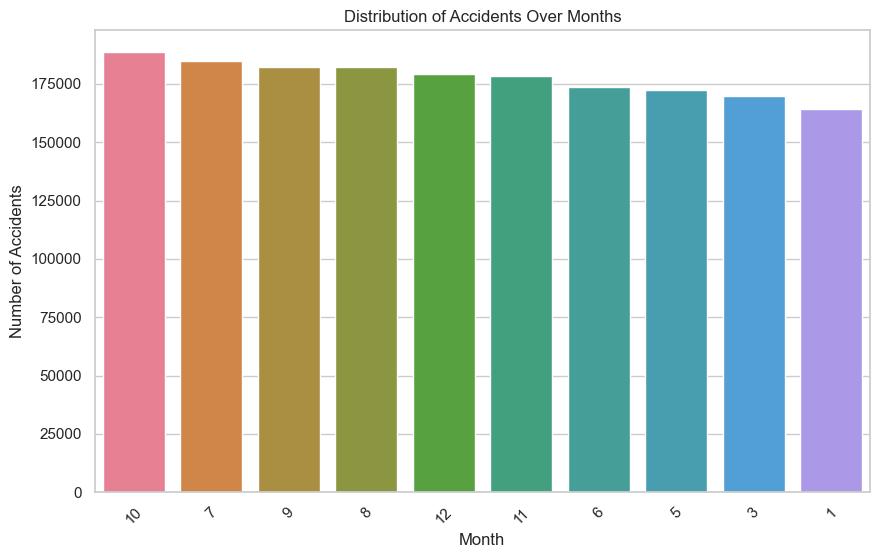

In [21]:

# Define colors for 12 different months
month_colors = sns.color_palette("husl", 12)

# Visualization 1: Distribution of accidents over time (e.g., by month)
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_MONTH', data=df, order=df['CRASH_MONTH'].value_counts().index[:10], palette=month_colors)
plt.title('Distribution of Accidents Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\1173013538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index[:10], palette=borough_colors)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\1173013538.py:4: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(y='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index[:10], palette=borough_colors)


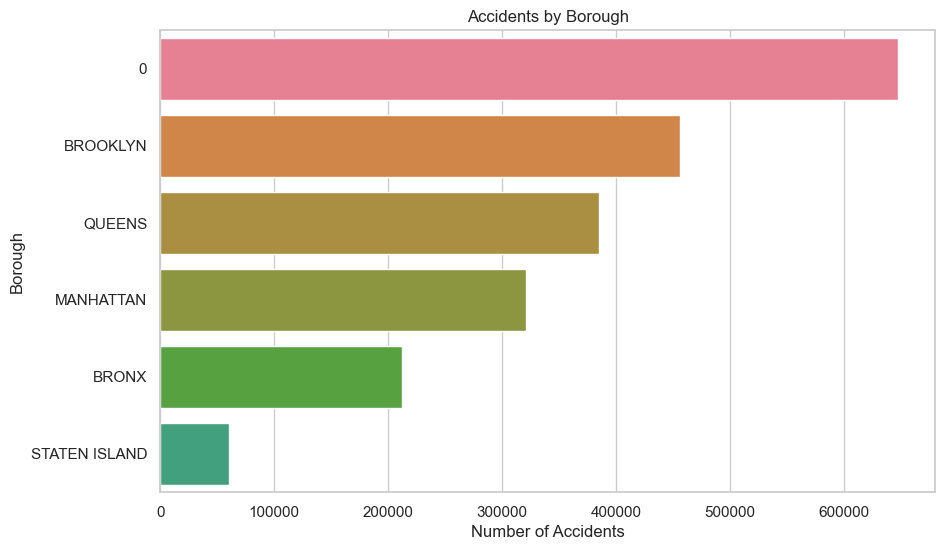

In [23]:
# Visualization 2: Accidents by borough
borough_colors = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
sns.countplot(y='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index[:10], palette=borough_colors)
plt.title('Accidents by Borough')
plt.xlabel('Number of Accidents')
plt.ylabel('Borough')
plt.show()

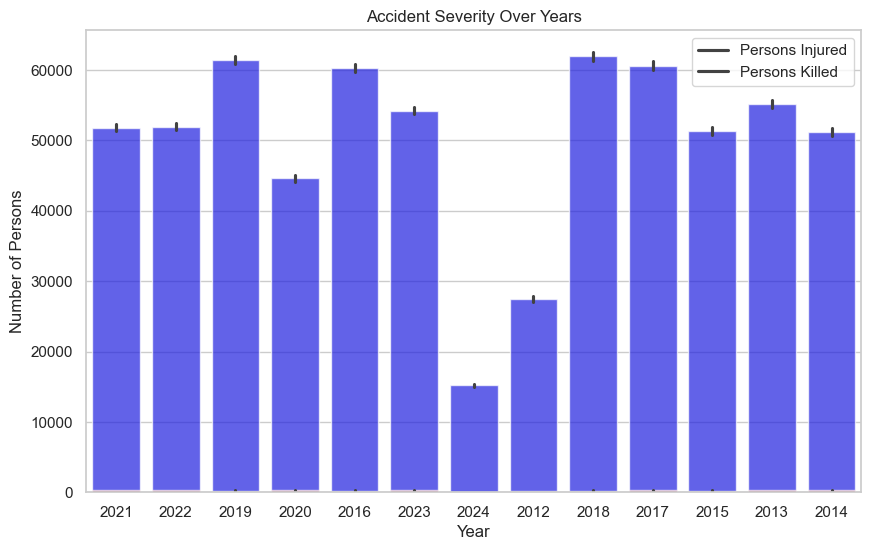

In [25]:
# Visualization 3: Accident severity
plt.figure(figsize=(10, 6))
sns.barplot(x='CRASH_YEAR', y='NUMBER OF PERSONS INJURED', data=df, estimator=sum, color='blue', alpha=0.7)
sns.barplot(x='CRASH_YEAR', y='NUMBER OF PERSONS KILLED', data=df, estimator=sum, color='red', alpha=0.7)
plt.title('Accident Severity Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Persons')
plt.legend(['Persons Injured', 'Persons Killed'])
plt.show()


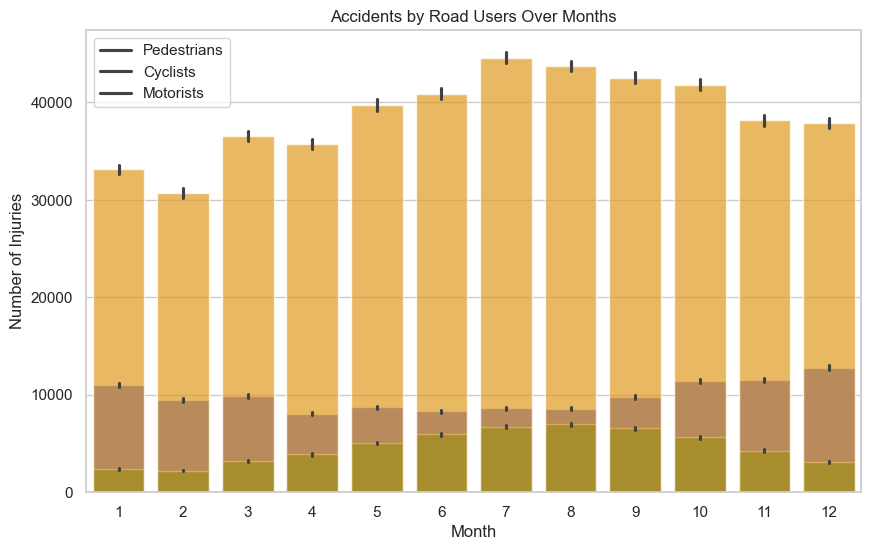

In [26]:
# Visualization 4: Accidents involving pedestrians, cyclists, and motorists
plt.figure(figsize=(10, 6))
sns.barplot(x='CRASH_MONTH', y='NUMBER OF PEDESTRIANS INJURED', data=df, estimator=sum, color='blue', alpha=0.7)
sns.barplot(x='CRASH_MONTH', y='NUMBER OF CYCLIST INJURED', data=df, estimator=sum, color='green', alpha=0.7)
sns.barplot(x='CRASH_MONTH', y='NUMBER OF MOTORIST INJURED', data=df, estimator=sum, color='orange', alpha=0.7)
plt.title('Accidents by Road Users Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.legend(['Pedestrians', 'Cyclists', 'Motorists'])
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\597602460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CONTRIBUTING FACTOR VEHICLE 1', data=df, order=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index[:10], palette='viridis')


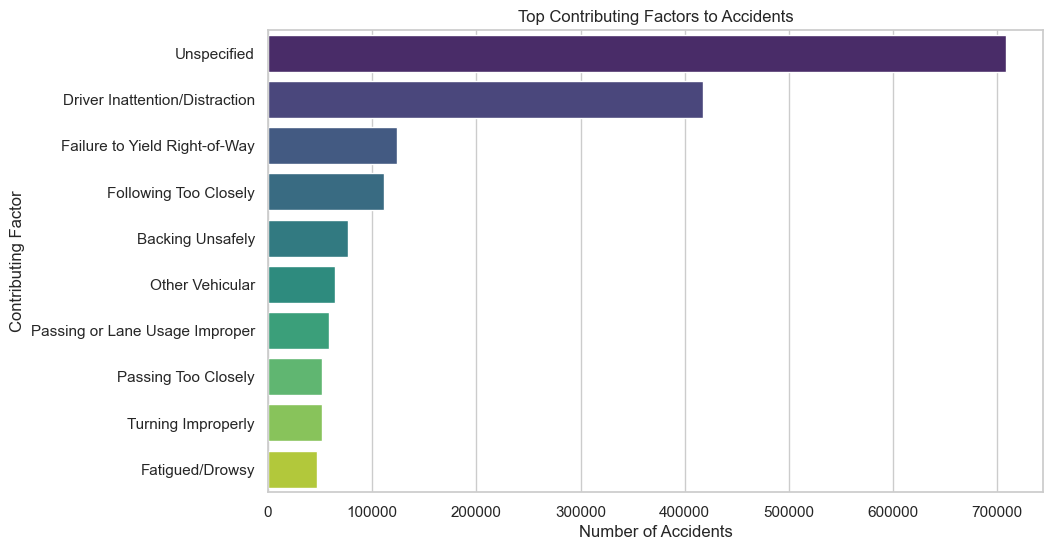

In [27]:
# Visualization 5: Contributing factors
plt.figure(figsize=(10, 6))
sns.countplot(y='CONTRIBUTING FACTOR VEHICLE 1', data=df, order=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index[:10], palette='viridis')
plt.title('Top Contributing Factors to Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factor')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\2549702696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=df[column].value_counts().index[:5], palette='muted')
C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\2549702696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=df[column].value_counts().index[:5], palette='muted')
C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\2549702696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, order=df[column].value_count

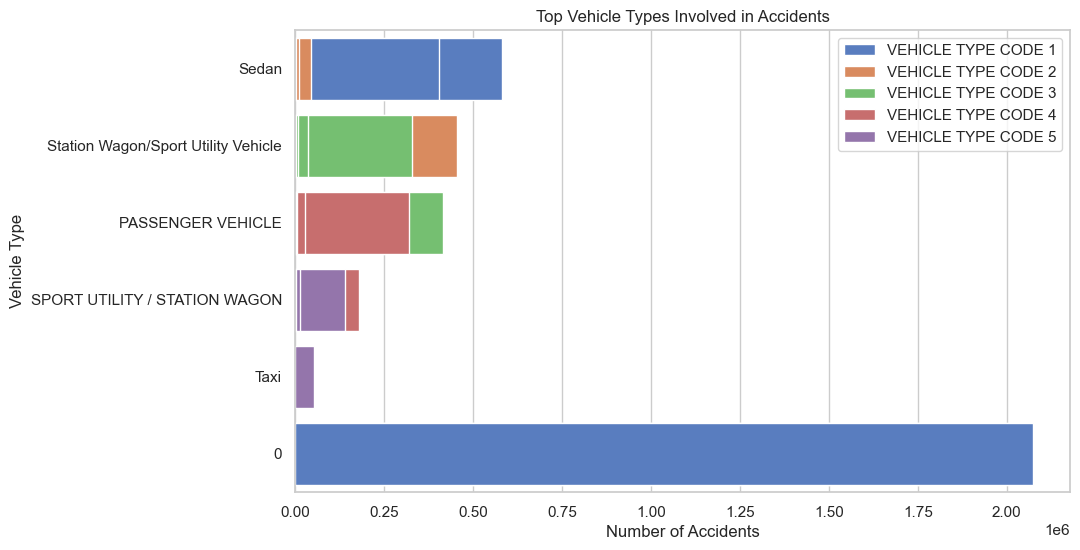

In [28]:
# Visualization 6: Vehicle types involved
vehicle_types = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
plt.figure(figsize=(10, 6))
for column in vehicle_types:
    sns.countplot(y=column, data=df, order=df[column].value_counts().index[:5], palette='muted')
plt.title('Top Vehicle Types Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.legend(vehicle_types)
plt.show()

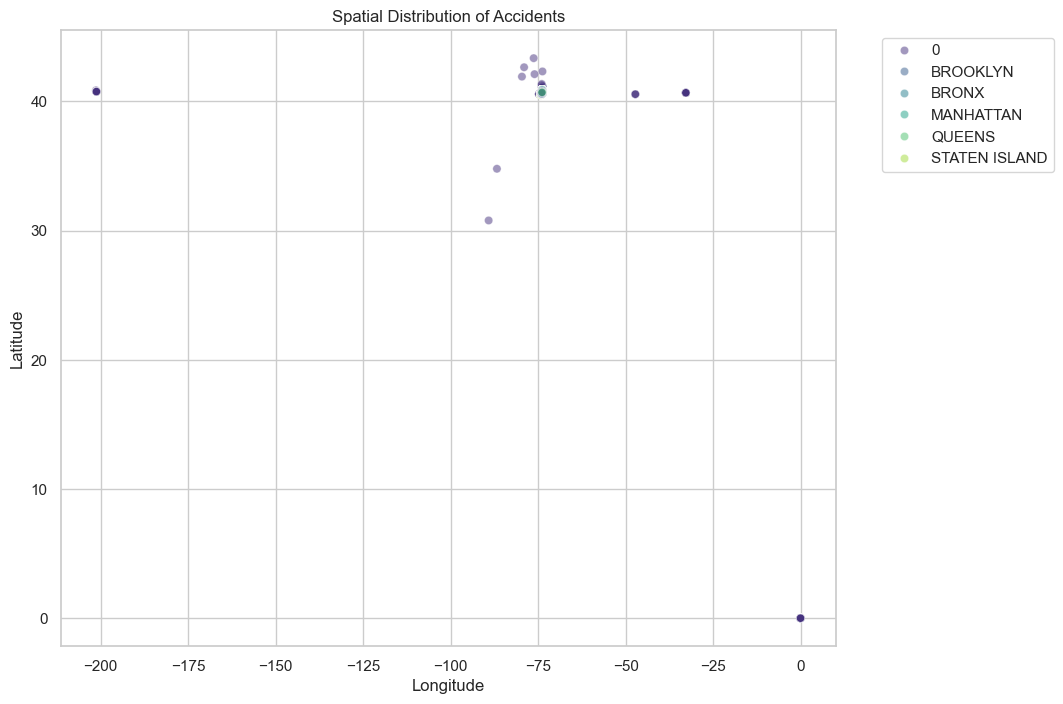

In [29]:
# Visualization 7: Spatial distribution of accidents
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='BOROUGH', palette='viridis', alpha=0.5)
plt.title('Spatial Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\1830407035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CRASH_YEAR', data=df, order=df['CRASH_YEAR'].value_counts().index[:10], palette='muted')


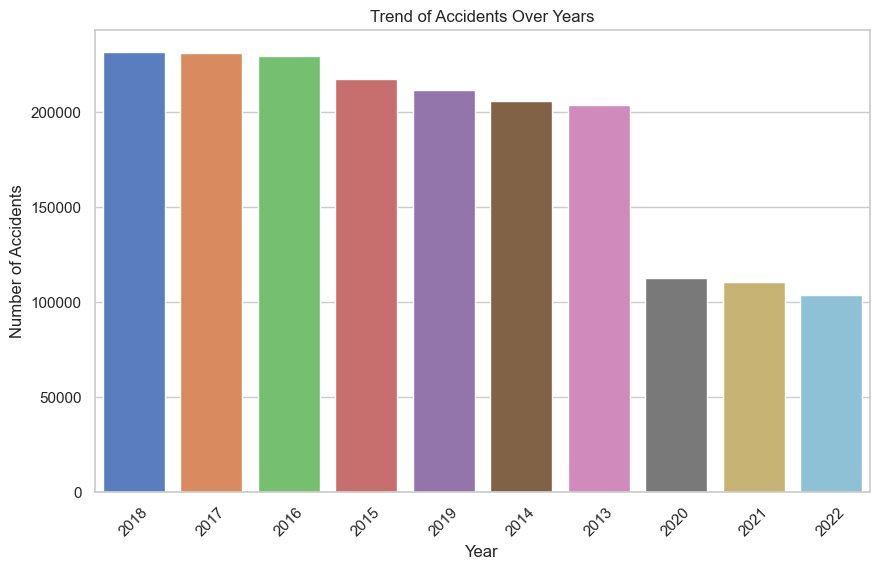

In [30]:
# Visualization 8: Trend analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_YEAR', data=df, order=df['CRASH_YEAR'].value_counts().index[:10], palette='muted')
plt.title('Trend of Accidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18020\3853151862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CRASH_HOUR', data=df, order=df['CRASH_HOUR'].value_counts().index[:10], palette='viridis')


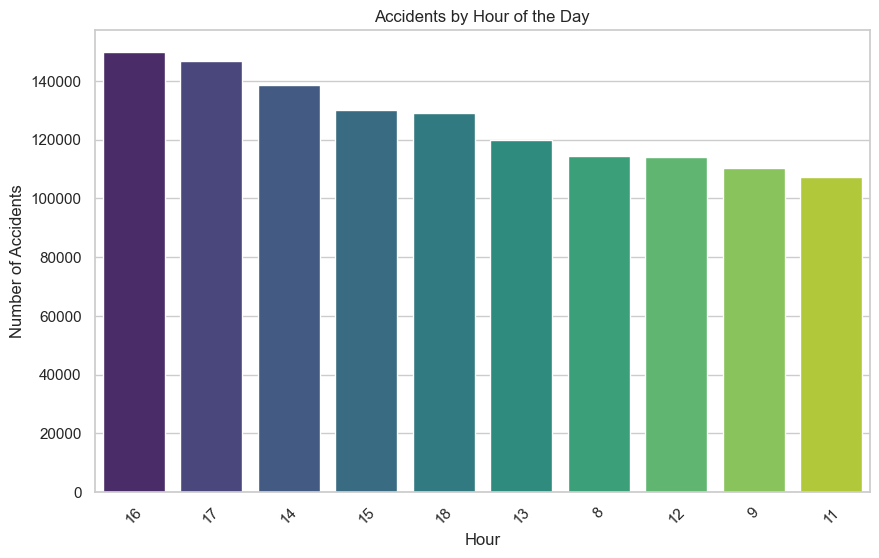

In [31]:
# Visualization 9: Time of day analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_HOUR', data=df, order=df['CRASH_HOUR'].value_counts().index[:10], palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

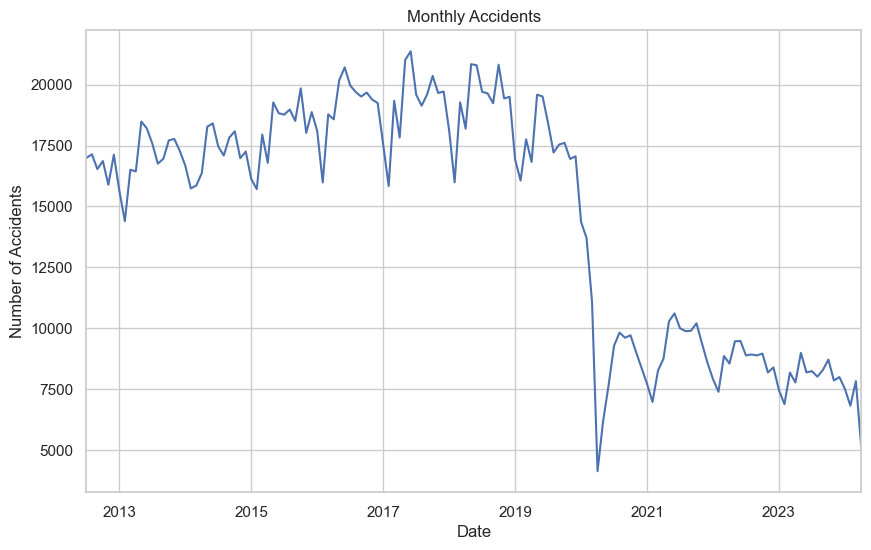

In [39]:
# 2. Time Series Analysis

# Convert 'CRASH DATE' to datetime type
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Set 'CRASH DATE' as index
df.set_index('CRASH DATE', inplace=True)

# Resample data to monthly frequency
monthly_accidents = df.resample('M').size()

# Plot monthly accidents
plt.figure(figsize=(10, 6))
monthly_accidents.plot()
plt.title('Monthly Accidents')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()


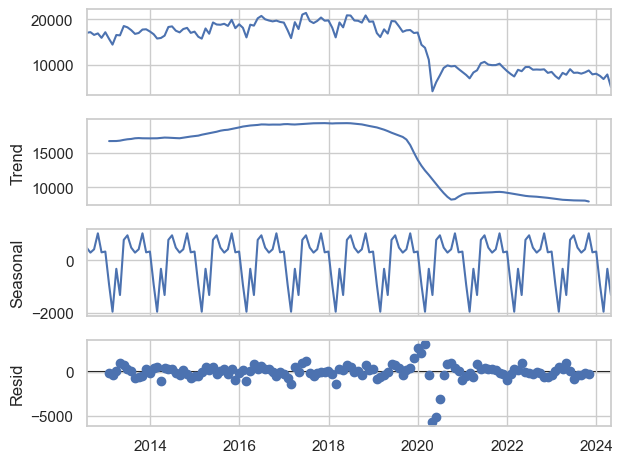

In [40]:
# Decompose time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_accidents, model='additive')
decomposition.plot()
plt.show()

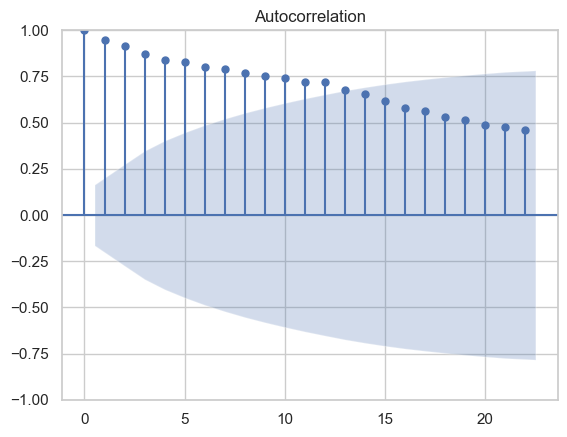

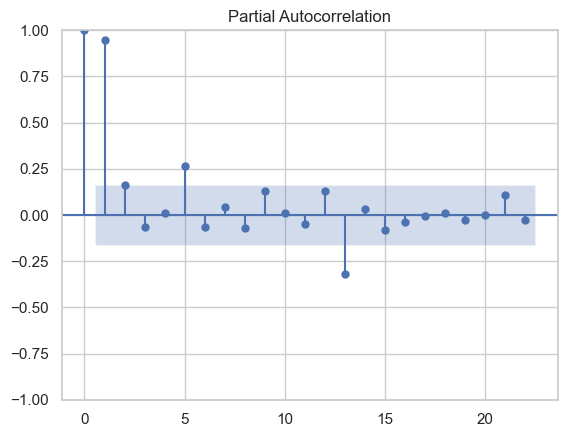

ADF Statistic: -0.18386094254652352
p-value: 0.9404182073234092
Critical Values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


In [41]:
# 3. Trend Analysis

# Plot ACF and PACF
plot_acf(monthly_accidents)
plt.show()

plot_pacf(monthly_accidents)
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(monthly_accidents)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

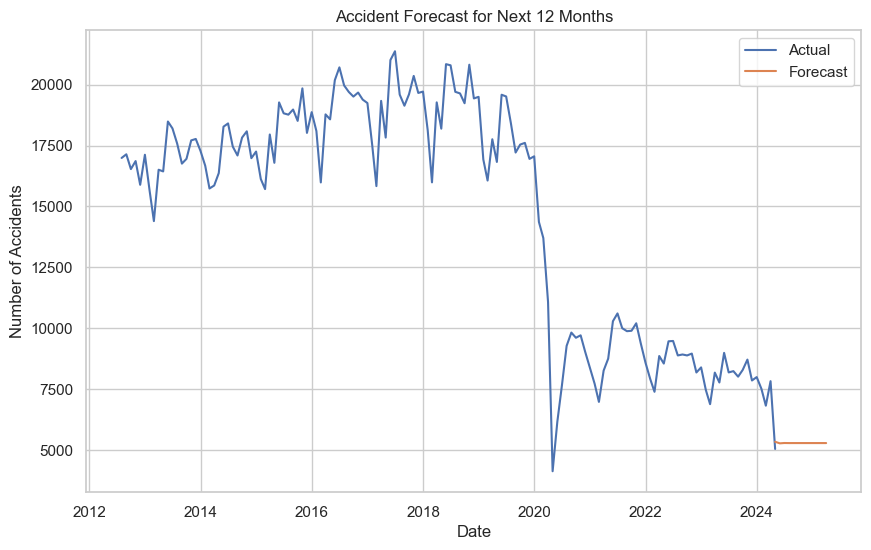

In [42]:
# 4. Forecasting

# Fit ARIMA model
model = ARIMA(monthly_accidents, order=(1, 1, 1))
fit_model = model.fit()

# Forecast next 12 months
forecast = fit_model.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index, monthly_accidents, label='Actual')
plt.plot(pd.date_range(start=monthly_accidents.index[-1], periods=12, freq='M'), forecast, label='Forecast')
plt.title('Accident Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()